# Dimensionality Reduction

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split

In [2]:
mnist = fetch_mldata('MNIST original')

In [3]:
mnist['data'][0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

C:\Users\aders\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [5]:
X, y = mnist['data'], mnist['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
randomforest = RandomForestClassifier()
resultado = cross_val_score(randomforest, X_train, y_train, cv=5)
randomforest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [7]:
# from sklearn.metrics import confusion_matrix
# confusion_matrix(resultado.predict(X_test), y_test)

In [8]:
resultado

array([0.94243127, 0.94456347, 0.93964825, 0.94284694, 0.94461813])

In [9]:
np.sqrt(len(X[0]))

28.0

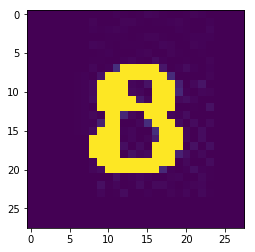

In [80]:
import cv2
import matplotlib.pyplot as plt

imgae = cv2.imread('assets/oito.jpg')
gray = cv2.cvtColor(imgae, cv2.COLOR_BGR2GRAY)

result_gray = []
for line in gray:
    for valor in np.nditer(line):
        if valor < 220:
            result_gray.extend([0])
        else:
            result_gray.extend([valor])   

result_gray = np.array(result_gray)
teste = 255 - result_gray.reshape(28,28)

plt.imshow(teste)

In [81]:
randomforest.predict(result_gray.reshape(1,-1))

array([5.])

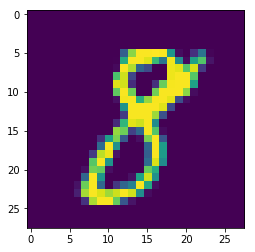

In [82]:
so2 = mnist['target'] == 8
xis = np.array(mnist['data'][so2][5].reshape(28,28))
plt.imshow(xis)

In [85]:
from sklearn.neural_network import MLPClassifier
teste_neural = MLPClassifier(hidden_layer_sizes=(1000,), warm_start=True)
teste_neural.fit(X_train, y_train)
teste_neural.score(X_test, y_test)

0.9627857142857142

In [86]:
teste_neural.predict(result_gray.reshape(1,-1))

array([5.])